# Análisis y Tratamiento de los Datos

In [0]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#Cargamos el DataSet
data = pd.read_csv("CreditCardData.csv", skiprows = 1)


In [4]:
#Vista previa de la información contenida en el DataSet.
data.head() 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [5]:
#Estructura de las columnas que tiene el DataSet.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10977 entries, 0 to 10976
Data columns (total 25 columns):
ID                            10977 non-null int64
LIMIT_BAL                     10977 non-null int64
SEX                           10976 non-null float64
EDUCATION                     10976 non-null float64
MARRIAGE                      10976 non-null float64
AGE                           10976 non-null float64
PAY_0                         10976 non-null float64
PAY_2                         10976 non-null float64
PAY_3                         10976 non-null float64
PAY_4                         10976 non-null float64
PAY_5                         10976 non-null float64
PAY_6                         10976 non-null float64
BILL_AMT1                     10976 non-null float64
BILL_AMT2                     10976 non-null float64
BILL_AMT3                     10976 non-null float64
BILL_AMT4                     10976 non-null float64
BILL_AMT5                     10976 non-null fl

**De lo anterior se puede apreciar que existen valores nulos.
Es solo un registro que no tiene información y por ende procedemos a eliminarlo**

In [6]:
data.loc[data['SEX'].isnull() == True]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
10976,10977,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data.drop(10976, inplace=True)

In [0]:
#Transformamos variables numericas a tipo categoricas.
data['SEX']=pd.to_numeric(data["SEX"], downcast = 'integer').astype('category')
data['EDUCATION']=pd.to_numeric(data["EDUCATION"], downcast = 'integer').astype('category')
data['MARRIAGE']=pd.to_numeric(data["MARRIAGE"], downcast = 'integer').astype('category')
data['default payment next month']=pd.to_numeric(data["default payment next month"], downcast = 'integer').astype('category')


In [20]:
### Valores unicos de cada variable categórica
variables_categoricas = [c for c in data if not pd.api.types.is_numeric_dtype(data[c])]
for v in variables_categoricas:
    print('Valores de la variable {0}: {1}'.format(v, data[v].unique()))

Valores de la variable SEX: [2, 1]
Categories (2, int64): [2, 1]
Valores de la variable EDUCATION: [2, 1, 3, 5, 4, 6, 0]
Categories (7, int64): [2, 1, 3, 5, 4, 6, 0]
Valores de la variable MARRIAGE: [1, 2, 3, 0]
Categories (4, int64): [1, 2, 3, 0]
Valores de la variable default payment next month: [1, 0]
Categories (2, int64): [1, 0]


In [0]:
### Diccionario con equivalencias de los campos MARRIAGE, SEX, EDUCATION. 
### Tomada de https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
diccionario = {'MARRIAGE': {1:'Casado', 2:'Soltero', 3:'Otros'},
       'SEX': {1:'Masculino', 2:'Femenino'},
        'EDUCATION': {1:'Posgrado', 2:'Universidad', 3:'Secundaria', 4:'Otros'}
       }
print(diccionario)

<Figure size 432x288 with 0 Axes>

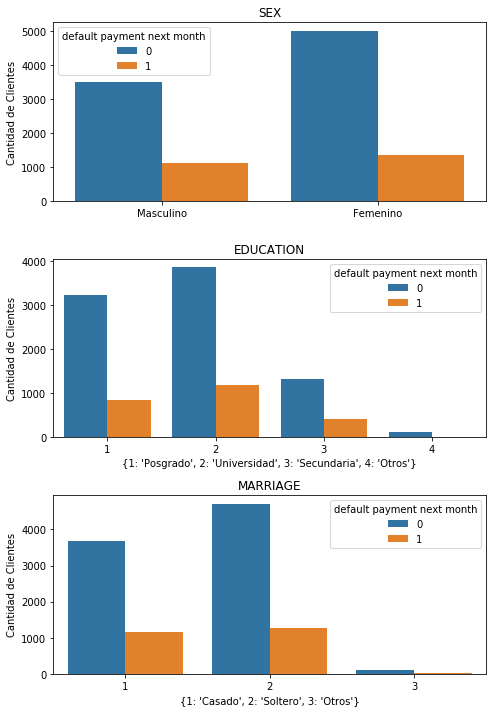

In [26]:
def graficoDataSet():  
  plt.clf()
  fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(7,10))

  #if sns.__version__ >= '0.9.0':
  sns.countplot(x = 'SEX', hue='default payment next month', data=data, ax = axes[0])
  #plt.title('Distribución de Morosidad por Sexo del Cliente ')
  axes[0].set_title('SEX')
  axes[0].set_ylabel('Cantidad de Clientes')
  axes[0].set_xlabel('')
  axes[0].set_xticklabels(['Masculino', 'Femenino'])
  #plt.show()

  #if sns.__version__ >= '0.9.0':
  sns.countplot(x = 'EDUCATION', hue='default payment next month', data=data, ax = axes[1])
  #plt.title('Distribución de Morosidad por Educación ')
  axes[1].set_title('EDUCATION')
  axes[1].set_ylabel('Cantidad de Clientes')
  axes[1].set_xlabel(diccionario['EDUCATION'])
  #plt.show()

  #if sns.__version__ >= '0.9.0':
  sns.countplot(x = 'MARRIAGE', hue='default payment next month', data=data, ax = axes[2])
  #plt.title('Distribución de Morosidad por Estado Civil ')
  axes[2].set_title('MARRIAGE')
  axes[2].set_ylabel('Cantidad de Clientes')
  axes[2].set_xlabel(diccionario['MARRIAGE'])
  #plt.show()

  plt.tight_layout()
  plt.savefig('GraficoDataSet.png')

graficoDataSet()  

**Se puede apreciar que existen categorías las cuales no están descritas en el origen del DataSet (https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) 
Estos casos serán incluidos com parte de la categoría Otros.**

In [22]:
data['EDUCATION'].replace({0:4, 5:4, 6:4}, inplace = True)
data['EDUCATION'].value_counts()

data['MARRIAGE'].replace({0:3}, inplace = True)
data['MARRIAGE'].value_counts()

2    5993
1    4834
3     149
Name: MARRIAGE, dtype: int64

<Figure size 432x288 with 0 Axes>

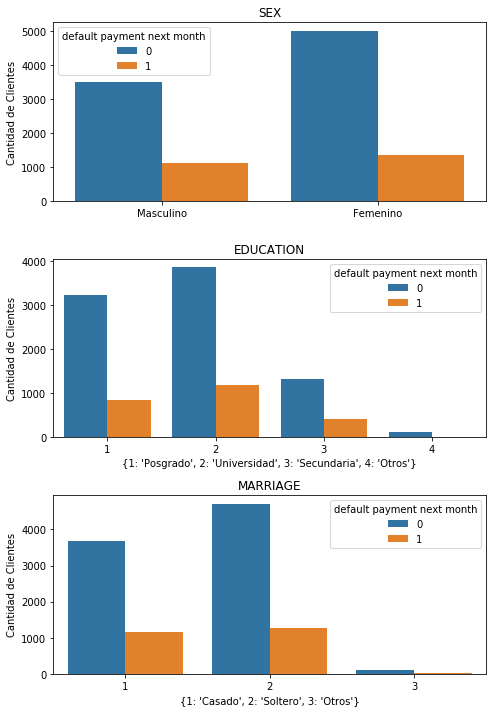

In [25]:
#Generamos el nuevo gráfico luego de modificar las variables categóricas.
graficoDataSet()

In [47]:
#Renombramos algunas columnas
data.rename(columns = {'PAY_0': 'PAY_1', 
                     'default payment next month':'default'}, 
                                 inplace = True) 
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [0]:
### Exportamos la data preprocesada
data.to_csv("CreditCardData_Processed.csv")

In [49]:
data.shape

(10976, 25)

# Entrenamiento

Separamos el conjunto de datos en Entrenamiento (60%) Validación (20%) y Test(20%)

In [46]:
from sklearn.model_selection import train_test_split

indices = data.index.values

### INICIO DE TU CÓDIGO
indices_trainval, indices_test = train_test_split(indices, test_size=0.2, random_state=0)
indices_train, indices_val = train_test_split(indices_trainval, test_size=0.25, random_state=0)
### FIN DE TU CÓDIGO

# El conjunto de entrenamiento es: data.loc[indices_train]
# El conjunto de validación es: data.loc[indices_val]
# El conjunto de prueba es: data.loc[indices_test]

print(indices_train.shape) #60%
print(indices_val.shape) #20%
print(indices_test.shape) #20%

(6585,)
(2195,)
(2196,)
